In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from citipy import citipy
import requests
from config import weather_api_key
from pprint import pprint
import time
import gmaps
from config import g_key

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(-90,90, size=1500)
lngs = np.random.uniform(-180,180, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for i in coordinates:
    print(i[0], i[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [7]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list. Adding enumerate to retrieve both the index and the city from the list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint url with each city
    city_url = url + '&q=' + city.replace(' ', '+')
    
    # Log the URL, record, and set numbers and the city
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
          
    # Add 1 to the record count
    record_count += 1  
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | chapais
Processing Record 5 of Set 1 | usinsk
Processing Record 6 of Set 1 | jalu
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | mercedes
Processing Record 9 of Set 1 | cabo san lucas
Processing Record 10 of Set 1 | prince rupert
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | laguna
Processing Record 13 of Set 1 | purwodadi
Processing Record 14 of Set 1 | ambala
Processing Record 15 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 16 of Set 1 | mayo
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | san carlos de bariloche
Processing Record 19 of Set 1 | ilulissat
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | maceio
Processing Record 22 of Set 1 | manicore
Processing Record 23 of Set 1 | gui

Processing Record 37 of Set 4 | yura
Processing Record 38 of Set 4 | rapina
Processing Record 39 of Set 4 | ostrovnoy
Processing Record 40 of Set 4 | nikolskoye
Processing Record 41 of Set 4 | krasnoselkup
Processing Record 42 of Set 4 | victor harbor
Processing Record 43 of Set 4 | maputo
Processing Record 44 of Set 4 | anzoategui
Processing Record 45 of Set 4 | mul
Processing Record 46 of Set 4 | anloga
Processing Record 47 of Set 4 | lashio
Processing Record 48 of Set 4 | brenes
Processing Record 49 of Set 4 | paamiut
Processing Record 50 of Set 4 | murray bridge
Processing Record 1 of Set 5 | yellowknife
Processing Record 2 of Set 5 | san patricio
Processing Record 3 of Set 5 | njombe
Processing Record 4 of Set 5 | mumford
Processing Record 5 of Set 5 | magadan
Processing Record 6 of Set 5 | bonavista
Processing Record 7 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 8 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 9 of Set 5 | dukat
Processi

Processing Record 29 of Set 8 | callaway
Processing Record 30 of Set 8 | bonanza
Processing Record 31 of Set 8 | nuevo progreso
Processing Record 32 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 33 of Set 8 | suez
Processing Record 34 of Set 8 | tessalit
Processing Record 35 of Set 8 | mersing
Processing Record 36 of Set 8 | hervey bay
Processing Record 37 of Set 8 | ligatne
Processing Record 38 of Set 8 | iwanai
Processing Record 39 of Set 8 | zeya
Processing Record 40 of Set 8 | bonito
Processing Record 41 of Set 8 | muisne
Processing Record 42 of Set 8 | gbadolite
Processing Record 43 of Set 8 | singaraja
Processing Record 44 of Set 8 | sur
Processing Record 45 of Set 8 | parfenyevo
Processing Record 46 of Set 8 | mjolby
Processing Record 47 of Set 8 | saint-pierre
Processing Record 48 of Set 8 | westport
Processing Record 49 of Set 8 | paris
Processing Record 50 of Set 8 | zonguldak
Processing Record 1 of Set 9 | malanje
Processing Record 2 of Set 9 | berle

Processing Record 13 of Set 12 | devils lake
Processing Record 14 of Set 12 | aswan
Processing Record 15 of Set 12 | kenora
Processing Record 16 of Set 12 | sarkand
Processing Record 17 of Set 12 | bairiki
Processing Record 18 of Set 12 | amapa
Processing Record 19 of Set 12 | reconquista
Processing Record 20 of Set 12 | chifeng
Processing Record 21 of Set 12 | bandarbeyla
Processing Record 22 of Set 12 | port said
Processing Record 23 of Set 12 | tidore
City not found. Skipping...
Processing Record 24 of Set 12 | gelemso
Processing Record 25 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 26 of Set 12 | samfya
Processing Record 27 of Set 12 | svetlaya
Processing Record 28 of Set 12 | muli
Processing Record 29 of Set 12 | progreso
Processing Record 30 of Set 12 | sorvag
City not found. Skipping...
Processing Record 31 of Set 12 | california city
Processing Record 32 of Set 12 | abha
Processing Record 33 of Set 12 | yumen
Processing Record 34 of Set 12 | domoni
Proce

In [10]:
len(city_data)

562

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,79.12,69,80,4.76,PF,2021-01-29 17:07:21
1,Vaini,-21.2000,-175.2000,75.20,100,90,14.97,TO,2021-01-29 17:07:24
2,Chapais,49.7834,-74.8492,1.40,85,90,11.50,CA,2021-01-29 17:08:39
3,Usinsk,65.9939,57.5281,-20.09,85,89,12.01,RU,2021-01-29 17:14:24
4,Jalu,29.0331,21.5482,56.28,64,0,4.99,LY,2021-01-29 17:10:39
5,Bethel,41.3712,-73.4140,12.99,57,40,17.27,US,2021-01-29 17:07:47
6,Mercedes,-34.6515,-59.4307,82.99,61,48,4.00,AR,2021-01-29 17:14:24
7,Cabo San Lucas,22.8909,-109.9124,73.00,68,40,14.97,MX,2021-01-29 17:08:13
8,Prince Rupert,54.3161,-130.3201,35.60,86,90,2.30,CA,2021-01-29 17:08:17
9,Cape Town,-33.9258,18.4232,75.20,53,20,18.41,ZA,2021-01-29 17:05:09


In [12]:
# New column order
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

In [13]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-01-29 17:07:21,-23.1203,-134.9692,79.12,69,80,4.76
1,Vaini,TO,2021-01-29 17:07:24,-21.2000,-175.2000,75.20,100,90,14.97
2,Chapais,CA,2021-01-29 17:08:39,49.7834,-74.8492,1.40,85,90,11.50
3,Usinsk,RU,2021-01-29 17:14:24,65.9939,57.5281,-20.09,85,89,12.01
4,Jalu,LY,2021-01-29 17:10:39,29.0331,21.5482,56.28,64,0,4.99
5,Bethel,US,2021-01-29 17:07:47,41.3712,-73.4140,12.99,57,40,17.27
6,Mercedes,AR,2021-01-29 17:14:24,-34.6515,-59.4307,82.99,61,48,4.00
7,Cabo San Lucas,MX,2021-01-29 17:08:13,22.8909,-109.9124,73.00,68,40,14.97
8,Prince Rupert,CA,2021-01-29 17:08:17,54.3161,-130.3201,35.60,86,90,2.30
9,Cape Town,ZA,2021-01-29 17:05:09,-33.9258,18.4232,75.20,53,20,18.41


In [14]:
# Create the output file (CSV)
output_data_file = 'weather_data/cities.csv'

# Export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [15]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df['Lat']
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Get Today's date in seconds
today = time.time()
today

1611940551.584159

In [17]:
today = time.strftime('%x')
today

'01/29/21'

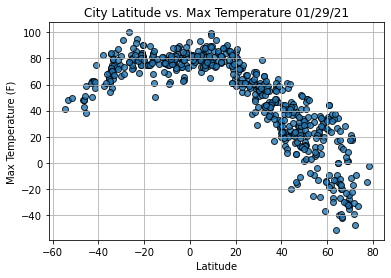

In [18]:
# Build the scatter plt for lat vs max temp
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
plt.ylabel("Max Temperature (F)")
plt.xlabel('Latitude')
plt.title(f'City Latitude vs. Max Temperature ' + time.strftime('%x'))
plt.grid(True)

plt.savefig('weather_data/Fig1.png')
plt.show()

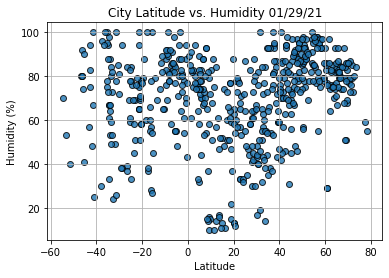

In [19]:
# Build the scatter plt for lat vs humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
plt.ylabel("Humidity (%)")
plt.xlabel('Latitude')
plt.title(f'City Latitude vs. Humidity ' + time.strftime('%x'))
plt.grid(True)

plt.savefig('weather_data/Fig2.png')
plt.show()

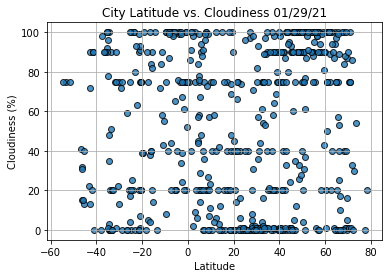

In [20]:
# Build the scatter plt for lat vs cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel('Latitude')
plt.title(f'City Latitude vs. Cloudiness ' + time.strftime('%x'))
plt.grid(True)

plt.savefig('weather_data/Fig3.png')
plt.show()

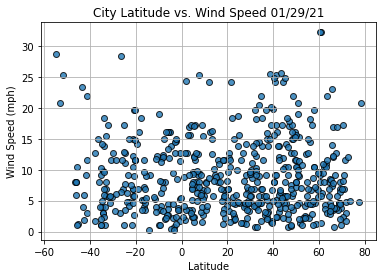

In [21]:
# Build the scatter plt for lat vs wind_speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
plt.ylabel("Wind Speed (mph)")
plt.xlabel('Latitude')
plt.title(f'City Latitude vs. Wind Speed ' + time.strftime('%x'))
plt.grid(True)

plt.savefig('weather_data/Fig4.png')
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Perform linear regression.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept

    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot of the x and y values.
    plt.scatter(x_values,y_values)
    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation and add its coordinates.
    plt.annotate(line_eq, (text_coordinates), fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City                         Mayo
Country                        US
Date          2021-01-29 17:14:25
Lat                       38.8876
Lng                      -76.5119
Max Temp                    33.01
Humidity                       43
Cloudiness                     75
Wind Speed                  17.27
Name: 13, dtype: object

In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

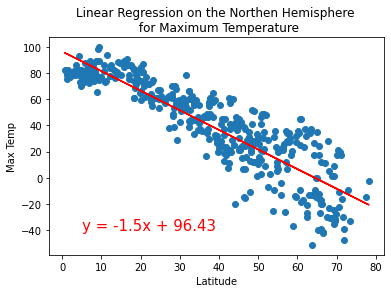

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northen Hemisphere \n for Maximum Temperature', 'Max Temp', (5,-40))

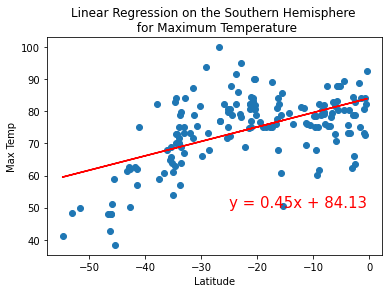

In [26]:
# Linear Regression on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp', (-25,50))

In [27]:
print(linregress(x_values, y_values))

LinregressResult(slope=0.4490768609829591, intercept=84.12813741439776, rvalue=0.5539209542781389, pvalue=9.854290895767282e-15, stderr=0.05270736838258243)


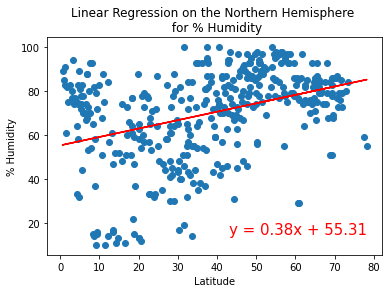

In [51]:
# Linear Regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity', (43,15))

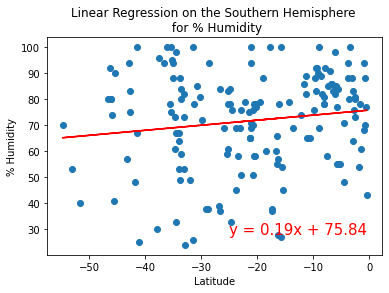

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-25,28))

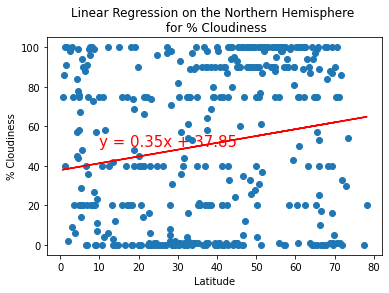

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
#Call the Function
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness', (10,50))

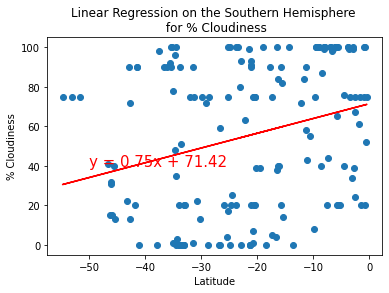

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,40))

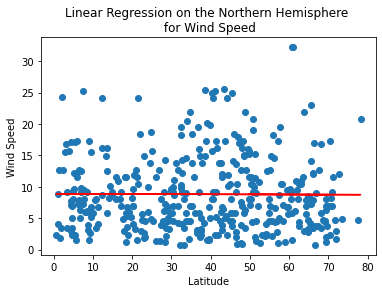

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

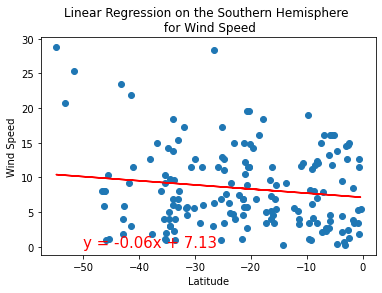

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,0))